<center>
    <a href="https://www.aus.edu/"><img src="https://i.imgur.com/pdZvnSD.png" width=200> </a>    
</center>
<h1 align=center><font size = 5>Principal Component Analysis</font>
<h1 align=center><font size = 5>Prepared by Alex Aklson, Ph.D.</font>
<h1 align=center><font size = 5>November 28, 2024</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_breast_cancer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

We will load a very simple and popular dataset.

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
features = iris.feature_names

iris_data = pd.DataFrame(X, columns=features)
iris_data['target'] = y

In [3]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris_data.shape

(150, 5)

In [5]:
iris_data['target'].value_counts()

,count
target,
0,50
1,50
2,50


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Apply PCA Algorithm (Manually)

Step 1: Center/Standardize the data.

In [7]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

Step 2: Calculate the covariance matrix.

In [8]:
cov_matrix = np.cov(X_normalized.T)
print("Covariance Matrix: \n", cov_matrix)

Covariance Matrix: 
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


Step 3: Find the eigenvalues and eigenvectors.

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues: {}".format(eigenvalues))
print("Eigenvectors: \n", eigenvectors)

Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors: 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


Step 4: Sort eigenvectors by eigenvalues in descending order.

In [10]:
sorted_indices = np.argsort(eigenvalues)[::-1]

eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

Visualize the cumulative sum of the eigenvalues.

In [11]:
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues) * 100

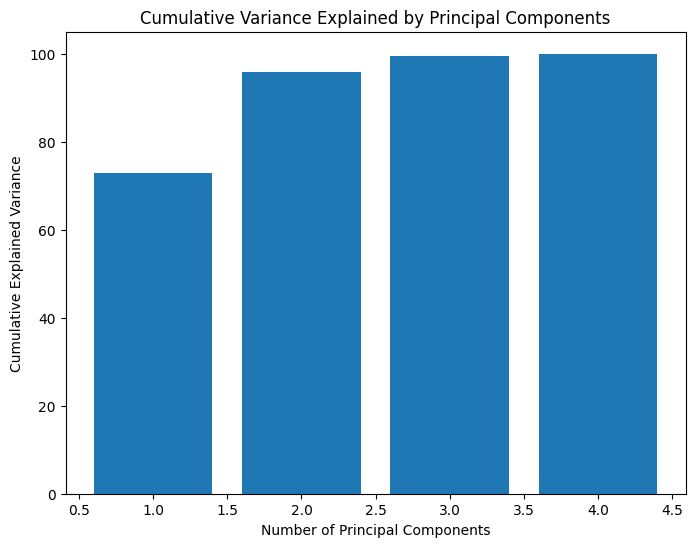

In [12]:
plt.figure(figsize=(8, 6))
plt.bar([1, 2, 3, 4], cumulative_variance)

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by Principal Components')
plt.show()

Step 5: Select top 2 principal components.

In [13]:
top_eigenvectors = eigenvectors[:, :2]
X_pca = X_normalized.dot(top_eigenvectors)

Visualize the data.

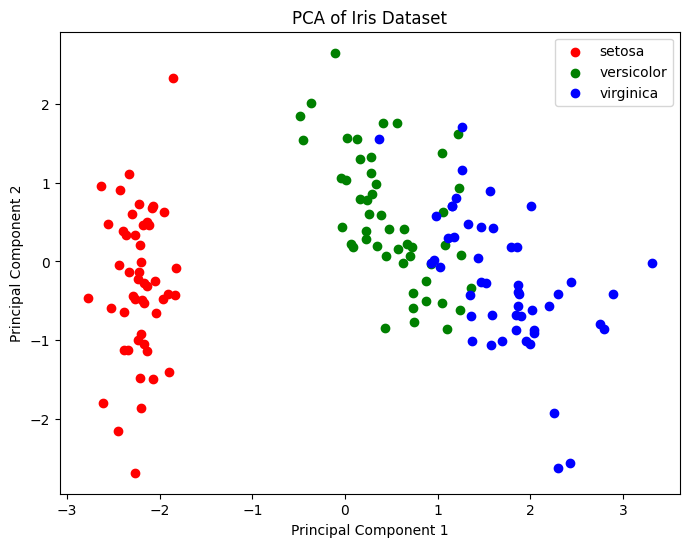

In [14]:
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], iris.target_names):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], color=color, label=label)

plt.title("PCA of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

### Apply PCA (Scikit Learn)

In [15]:
no_components = iris_data.shape[1] - 1

Define an instance of PCA object.

In [16]:
pca = PCA(n_components=no_components, random_state=42)

Apply PCA algorithm.

In [17]:
X_pca = pca.fit_transform(X_normalized)

Get the eigenvalues and eignvectors.

In [18]:
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

print("Eigenvalues: {}".format(eigenvalues))
print("Eigenvectors: \n", eigenvectors.T)

Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors: 
 [[ 0.52106591  0.37741762  0.71956635 -0.26128628]
 [-0.26934744  0.92329566 -0.24438178  0.12350962]
 [ 0.5804131   0.02449161 -0.14212637  0.80144925]
 [ 0.56485654  0.06694199 -0.63427274 -0.52359713]]


Step 5: Select top 2 principal components

In [19]:
top_eigenvectors = eigenvectors[:, :2]
X_pca = X_normalized.dot(top_eigenvectors)

Visualize the data.

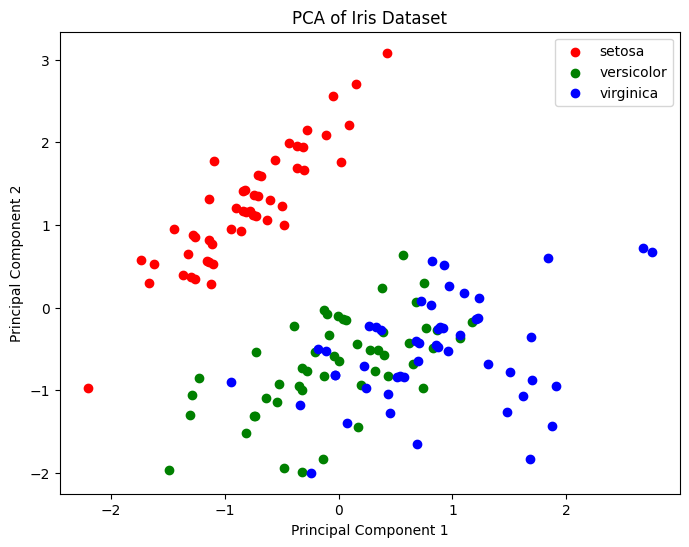

In [20]:
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], iris.target_names):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], color=color, label=label)

plt.title("PCA of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

### Applying PCA to Machine Learning Problem

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
pca = PCA(n_components=no_components, random_state=42)

In [25]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#### Apply PCA to Breast Cancer Dataset

- Train an SVM classifier with RBF kernel to build a baseline.
- Use PCA to perform dimensionality reduction on the dataset and report how many components you have to retain to maintain the same performance.

Load Breast Cancer dataset.

In [32]:
data = load_breast_cancer()
X = data.data
y = data.target

In [33]:
cancer_data = pd.DataFrame(X, columns=data.feature_names)
cancer_data['target'] = y

In [34]:
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [35]:
cancer_data.shape

(569, 31)

- Split the data into training and test sets.


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

- Standardize the data


In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Build an SVM classifier with RBF kernel


In [40]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

- Calculate accuracy of classifier


In [41]:
y_pred = svm.predict(X_test_scaled)
baseline_accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Accuracy (No PCA): {baseline_accuracy:.4f}")

Baseline Accuracy (No PCA): 0.9825


- Apply PCA to reduce dimensionality of data


In [42]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [43]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print(f"Cumulative Variance Ratio: {cumulative_variance_ratio}")

Cumulative Variance Ratio: [0.44413492 0.6335811  0.72901466 0.79626156 0.85143846 0.8907838
 0.91260146 0.92843464 0.94122247 0.95267689 0.96193959 0.97041388
 0.97841134 0.9837184  0.98684091 0.98941237 0.99145162 0.99331859
 0.9948096  0.99584631 0.99677202 0.99763844 0.99835822 0.99894655
 0.9994512  0.99969671 0.99991281 0.99996999 0.99999572 1.        ]


In [44]:
n_components = np.argmax(cumulative_variance_ratio >= 0.9825) + 1
print(f"Number of components to retain 98.25% variance: {n_components}")

Number of components to retain 98.25% variance: 14


- Build an SVM classifier with RBF kernel using reduced data


In [45]:
pca_reduced = PCA(n_components=n_components)
X_train_pca_reduced = pca_reduced.fit_transform(X_train_scaled)
X_test_pca_reduced = pca_reduced.transform(X_test_scaled)

In [46]:
svm_pca = SVC(kernel='rbf', random_state=42)
svm_pca.fit(X_train_pca_reduced, y_train)

SVC(random_state=42)

- Calculate accuracy of classifier with reduced dimensions


In [47]:
y_pred_pca = svm_pca.predict(X_test_pca_reduced)
reduced_accuracy = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy after PCA (Reduced Dimensions): {reduced_accuracy:.4f}")

Accuracy after PCA (Reduced Dimensions): 0.9737


- Find number of reduced dimensions that result in same peformance

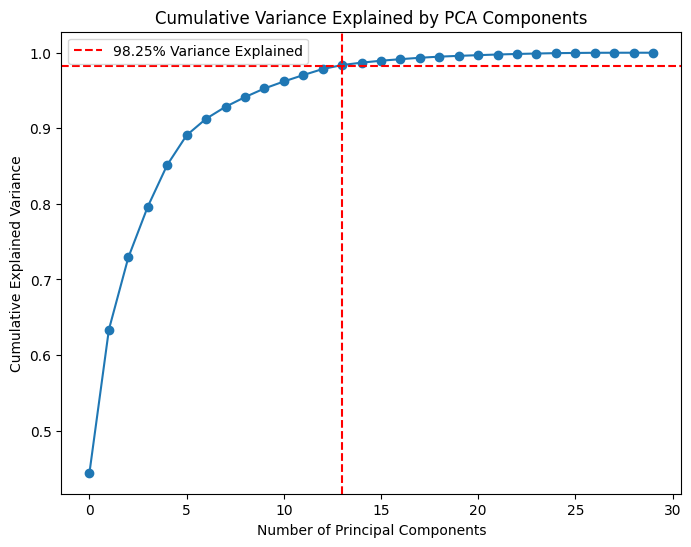

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance_ratio, marker='o')
plt.axhline(y=0.9825, color='r', linestyle='--', label='98.25% Variance Explained')
plt.axvline(x=n_components - 1, color='r', linestyle='--')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.show()